In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import load_iris
iris = load_iris()
X = iris.data
y = iris.target

In [3]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, stratify=y)

In [4]:
from sklearn.tree import DecisionTreeClassifier

In [5]:
clf = DecisionTreeClassifier(max_leaf_nodes=3)
clf.fit(X_train, y_train)

DecisionTreeClassifier(max_leaf_nodes=3)

In [ ]:
#clf1 = DecisionTreeClassifier().fit(X_train, y_train)

In [6]:
from sklearn.metrics import accuracy_score

y_pred = clf.predict(X_test)
accuracy_score(y_test, y_pred)

0.9111111111111111

In [7]:
clf2 = DecisionTreeClassifier(criterion='entropy')
clf2.fit(X_train, y_train)

DecisionTreeClassifier(criterion='entropy')

In [8]:
X = iris.data[:,:2]
y = iris.target
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size=0.3, stratify=y)

In [9]:
df = pd.DataFrame(X,columns=iris.feature_names[:2])
df['Target'] = iris.target
df.head()

sepal length (cm)  sepal width (cm)  Target
0                5.1               3.5       0
1                4.9               3.0       0
2                4.7               3.2       0
3                4.6               3.1       0
4                5.0               3.6       0

In [11]:
dtc = DecisionTreeClassifier() # A Simple Classifier
dtc.fit(X_train, y_train) # training

DecisionTreeClassifier()

In [12]:
y_pred = dtc.predict(X_test)
accuracy_score(y_test, y_pred)

0.7111111111111111

In [13]:
from sklearn.model_selection import GridSearchCV, cross_val_score

param_grid = {
               'criterion':['gini','entropy'], 
               'max_depth': [3,5,7,9, 11, 13, 15, 25]
             }

gs_inst = GridSearchCV(dtc, param_grid=param_grid, cv=3)
gs_inst.fit(X_train, y_train)

GridSearchCV(cv=3, estimator=DecisionTreeClassifier(),
             param_grid={'criterion': ['gini', 'entropy'],
                         'max_depth': [3, 5, 7, 9, 11, 13, 15, 25]})

In [14]:
y_pred_gs = gs_inst.predict(X_test)
accuracy_score(y_test, y_pred_gs)

0.7111111111111111

In [15]:
gs_inst.best_params_

{'criterion': 'gini', 'max_depth': 3}

In [16]:
for i, j in zip(gs_inst.cv_results_['mean_test_score'],gs_inst.cv_results_['params']):
    print(i, j)

0.7333333333333334 {'criterion': 'gini', 'max_depth': 3}
0.6857142857142856 {'criterion': 'gini', 'max_depth': 5}
0.6571428571428571 {'criterion': 'gini', 'max_depth': 7}
0.6666666666666666 {'criterion': 'gini', 'max_depth': 9}
0.6666666666666666 {'criterion': 'gini', 'max_depth': 11}
0.6666666666666666 {'criterion': 'gini', 'max_depth': 13}
0.6666666666666666 {'criterion': 'gini', 'max_depth': 15}
0.6666666666666666 {'criterion': 'gini', 'max_depth': 25}
0.7142857142857143 {'criterion': 'entropy', 'max_depth': 3}
0.6857142857142856 {'criterion': 'entropy', 'max_depth': 5}
0.6857142857142856 {'criterion': 'entropy', 'max_depth': 7}
0.6666666666666666 {'criterion': 'entropy', 'max_depth': 9}
0.6761904761904761 {'criterion': 'entropy', 'max_depth': 11}
0.6761904761904761 {'criterion': 'entropy', 'max_depth': 13}
0.6761904761904761 {'criterion': 'entropy', 'max_depth': 15}
0.6761904761904761 {'criterion': 'entropy', 'max_depth': 25}


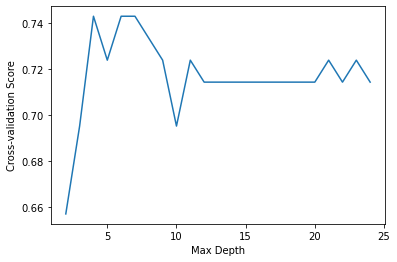

In [17]:
dtc = DecisionTreeClassifier()
max_depths = range(2,25)
param_grid = {'max_depth' : max_depths}
gs_inst = GridSearchCV(dtc, param_grid=param_grid,cv=5)
gs_inst.fit(X_train, y_train)
plt.plot(max_depths,gs_inst.cv_results_['mean_test_score'])
plt.xlabel('Max Depth')
plt.ylabel("Cross-validation Score");

In [18]:
gs_inst.best_params_

{'max_depth': 6}

From this list of scores, you can see that deeper trees perform worse than shallow
trees. In detail, the data in the training set is split into five parts. Training occurs in
four parts while testing happens in one of the five parts. Very deep trees overfit:
they perform well on the training sets, but on the five testing sets of the crossvalidation,
they perform badly.

In [19]:
gs_inst.best_estimator_

DecisionTreeClassifier(max_depth=6)

In [20]:
obj = gs_inst.best_estimator_
obj.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=6)

In [21]:
clf3 = DecisionTreeClassifier(criterion='gini', max_depth=4).fit(X_train, y_train)
y_pred = clf3.predict(X_test)
accuracy_score(y_test, y_pred)

0.7111111111111111

In [22]:
X = iris.data[:,:2]
y = iris.target

In [23]:
plot_step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 1].max() + 1
y_min, y_max = X[:, 0].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

In [24]:
outcome = clf3.predict(np.c_[xx.ravel(), yy.ravel()])

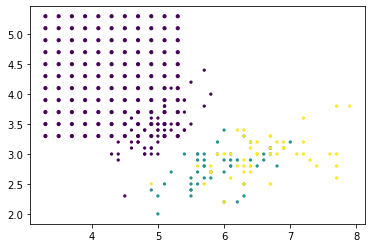

In [25]:
plt.scatter(X[:,0],X[:,1],c=y,s=5,cmap='viridis')
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,s=10,alpha=1, cmap='viridis')
plt.show()

In [26]:
from sklearn.datasets import make_blobs

In [27]:
X,Y = make_blobs(n_features=2, n_samples=1000, cluster_std=.8, centers=4, random_state=6)

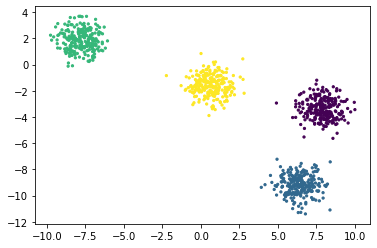

In [28]:
plt.scatter(X[:,0],X[:,1],c=Y,s=5, cmap='viridis')

In [29]:
dt = DecisionTreeClassifier()

In [30]:
dt.fit(X,Y)

DecisionTreeClassifier()

In [31]:
plot_step = 0.2
x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))

In [32]:
outcome = dt.predict(np.c_[xx.ravel(), yy.ravel()])

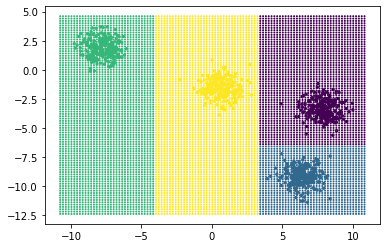

In [33]:
plt.scatter(X[:,0],X[:,1],c=Y,s=5,cmap='viridis')
plt.scatter(xx.ravel(),yy.ravel(),c=outcome,s=1,alpha=1, cmap='viridis')
plt.show()